In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
from sklearn.utils import shuffle
from sklearn import cluster
import CreateDataFunctions as df
from scipy.spatial import distance
from array import *
import warnings
warnings.filterwarnings('ignore')

data1, c1  = df.Data_gussian_cluster()
data2, c2 = df.Data_circ_cluster()
data3, c3 = df.Data_separated_clusters()
data4, c4 = df.ThreeCirclesData()

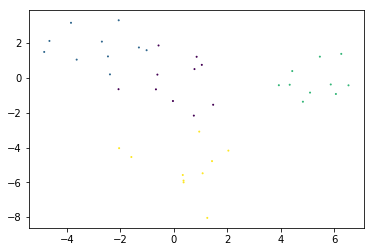

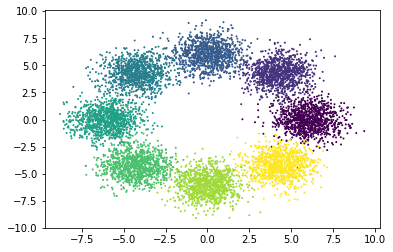

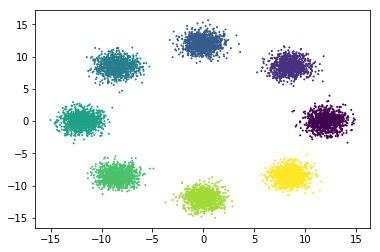

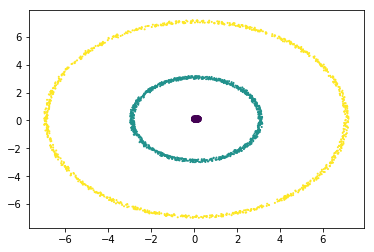

In [2]:
plt.scatter(data1[:,0],data1[:,1],s=1,c=c1)
plt.show()
plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
plt.show()
plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
plt.show()
plt.scatter(data4[:,0],data4[:,1],s=1,c=c4)
plt.show()

In [22]:
def ComputeBIC_kmeans(kmeans, data):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[0][i]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    
    
    #BIC = [cl_var + i*d*np.log(n) for i in range(m)]
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return BIC, labels
    
    


In [7]:
def getCentresFromLabels(labels, data, nrClusters):
    means = np.zeros((nrClusters,data.shape[1]))
    for i in range(nrClusters):
        dat = data[labels == i]
        for j in range(dat.shape[1]):
            means[i,j] = np.mean(dat[:,j])
    return means

def ComputeBIC_spec_clus(SpectralClustering, data):
    labels  = SpectralClustering.labels_    
    m = SpectralClustering.n_clusters
    n = np.bincount(labels)
    N, d = data.shape
    centers = getCentresFromLabels(labels, data, m)
    
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(data[np.where(labels == i)],
    [centers[i,:]], 'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
            
    BIC = (np.sum([n[i] * np.log(n[i]) -
        n[i] * np.log(N) -
            ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
           ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term)*(-1)
    
    return BIC, labels

In [23]:
ks = range(1,12)
KMeans1 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data1) for k in ks]
KMeans2 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data2) for k in ks]
KMeans3 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data3) for k in ks]
KMeans4 = [cluster.KMeans(n_clusters = k, init="k-means++").fit(data4) for k in ks]

BIC_kmeans1 = [ComputeBIC_kmeans(kmeansi,data1)[0] for kmeansi in KMeans1]
BIC_kmeans2 = [ComputeBIC_kmeans(kmeansi,data2)[0] for kmeansi in KMeans2]
BIC_kmeans3 = [ComputeBIC_kmeans(kmeansi,data3)[0] for kmeansi in KMeans3]
BIC_kmeans4 = [ComputeBIC_kmeans(kmeansi,data4)[0] for kmeansi in KMeans4]

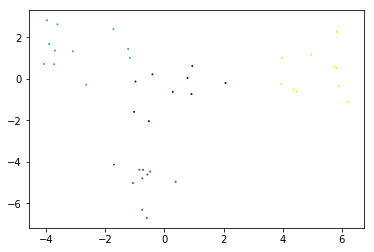

In [25]:
color = ComputeBIC_kmeans(KMeans1[3],data1)[1]
plt.scatter(data1[:,0],data1[:,1],s=1,c=color)
plt.show()
#plt.scatter(data2[:,0],data2[:,1],s=1,c=c2)
#plt.show()
#plt.scatter(data3[:,0],data3[:,1],s=1,c=c3)
#plt.show()
#plt.scatter(data4[:,0],data4[:,1],s=1,c=c4)
#plt.show()

In [11]:
ks = range(1,12)
SpecClus1 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data1) for k in ks]
BIC_SpecClus1 = [ComputeBIC_spec_clus(kmeansi,data1) for kmeansi in SpecClus1]
SpecClus2 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data2) for k in ks]
BIC_SpecClus2 = [ComputeBIC_spec_clus(kmeansi,data2) for kmeansi in SpecClus2]
SpecClus3 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data3) for k in ks]
BIC_SpecClus3 = [ComputeBIC_spec_clus(kmeansi,data3) for kmeansi in SpecClus3]
SpecClus4 = [cluster.SpectralClustering(k,eigen_solver='arpack',affinity="nearest_neighbors").fit(data4) for k in ks]
BIC_SpecClus4 = [ComputeBIC_spec_clus(kmeansi,data4) for kmeansi in SpecClus4]

c:\users\erikf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\erikf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\erikf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
c:\users\erikf\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral emb

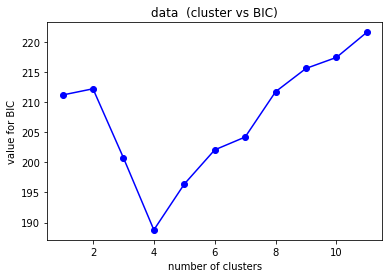

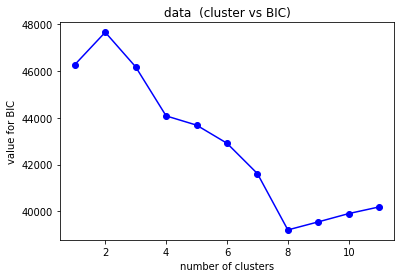

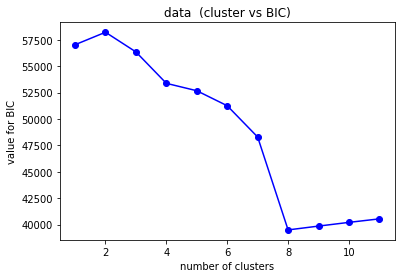

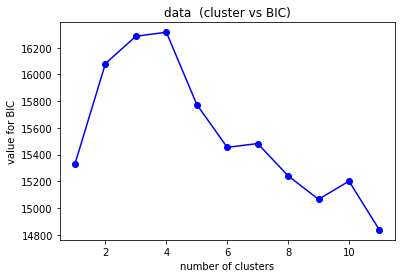

In [8]:
#print(BIC_kmeans1)
plt.plot(ks,BIC_kmeans1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans2)
plt.plot(ks,BIC_kmeans2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans3)
plt.plot(ks,BIC_kmeans3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_kmeans4)
plt.plot(ks,BIC_kmeans4,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()

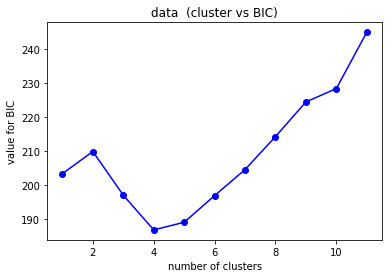

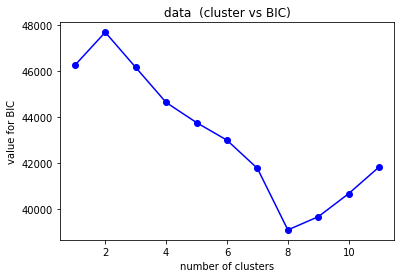

NameError: name 'BIC_SpecClus3' is not defined

In [9]:
#print(BIC_SpecClus1)
plt.plot(ks,BIC_SpecClus1,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus2)
plt.plot(ks,BIC_SpecClus2,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus3)
plt.plot(ks,BIC_SpecClus3,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()
#print(BIC_SpecClus4)
plt.plot(ks,BIC_SpecClus4,'b-o')
plt.title("data  (cluster vs BIC)")
plt.xlabel("number of clusters")
plt.ylabel("value for BIC")
plt.show()

In [13]:
print([1,1,1]*3)

[1, 1, 1, 1, 1, 1, 1, 1, 1]
